In [4]:
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np


# Compartmental models

Comparmental models are a category of infectious diseases in which a population is divided into compartments, with the assumption that all elements in the same compartment present the same characteristics

## SIR model

The SIR model is one of the most basic examples of compartmental models. The model consists of three compartments: 
- Susceptible (S)
- Infectious (I)
- Recovered (R) (or better not infectious, includes deceased)

The assumptions underlying this model require the disease to be able to infect through human to human transmission, and to have the recovered individuals acquire lasting immunity.

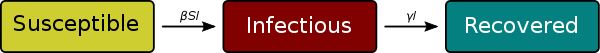

A full modeling requires the specification of the transition rates. The S->I infection rate depends on the average number of contacts per person per time, the probability of transmission when in contact with an infected individual, and the number of infected instances (or the probability that any individual is infected).
The I->R rate depends on the rate of recovery and mortality, and the total number of infected individuals.

### ODE formulation of SIR model

Compartmental models can be formulated in a deterministic manner through differential equations. This makes them less realistic than stochastic models, but this formalism is easier to analyse.

The ODE SIR model for diseases whose dynamics are faster than the birth and death dynamics of a population (i.e. without vital dynamics) is modeled by the following equations.

$$\begin{aligned}
&\frac{d S}{d t}=-\frac{\beta I S}{N}\\
&\frac{d I}{d t}=\frac{\beta I S}{N}-\gamma I\\
&\frac{d R}{d t}=\gamma I
\end{aligned}$$



If we discretize these equations in order to simulate it we obtain:
$$\begin{aligned}
&S_{k+1}= S_K (1 -\frac{\beta I_k}{N})\\
&I_{k+1}=I_k (1 +\frac{\beta S_k}{N}-\gamma)\\
&R_{k+1}= R_k + \gamma I_k
\end{aligned}$$

Where $\beta$ is a product of number of encounters and infection probability.

In [26]:
def SRI_step(s, i, r, beta=0.5, gamma=0.5):
    N = int(s+i+r)
    s_new = s*(1 - beta*i/N)
    r_new = r + gamma * i
    #i_new = i*(1 - gamma + beta*s/N)
    i_new = N - s_new - r_new
    return s_new, i_new, r_new

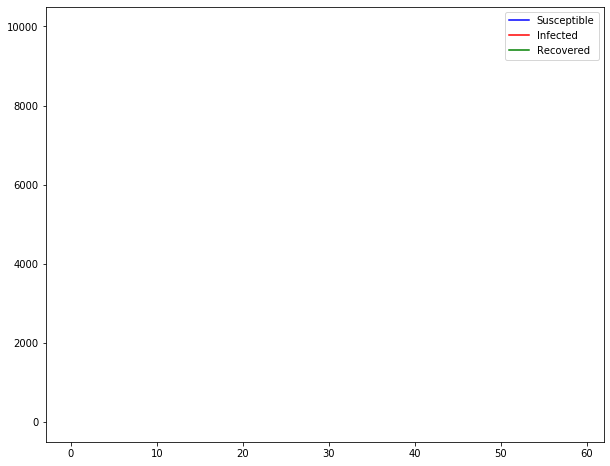

In [29]:
%matplotlib inline


initial_infected = 5
encounters_per_person = 2
infection_probability = 0.3
beta = encounters_per_person * infection_probability

D = 5 # Duration of the disease
gamma = 1/D

N = 10000

timeline = np.arange(60)
susceptible = [N-initial_infected]
infected = [initial_infected]
recovered = [0]


for step in timeline[1:]:
    s, i, r = SRI_step(susceptible[-1], infected[-1], recovered[-1], beta=beta, gamma=gamma)
    susceptible.append(s)
    infected.append(i)
    recovered.append(r)

fig, ax = plt.subplots(figsize=(10, 8))
l1, = ax.plot(timeline, susceptible, color="blue", label="Susceptible")
l2, = ax.plot(timeline, infected, color="red", label="Infected")
l3, = ax.plot(timeline, recovered, color="green", label="Recovered")
ax.legend()


def animate_step(i):
    l1.set_data(timeline[:i], susceptible[:i])
    l2.set_data(timeline[:i], infected[:i])
    l3.set_data(timeline[:i], recovered[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate_step, frames=len(timeline))
ani